In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("./Data set/gene_expression.csv")

In [52]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

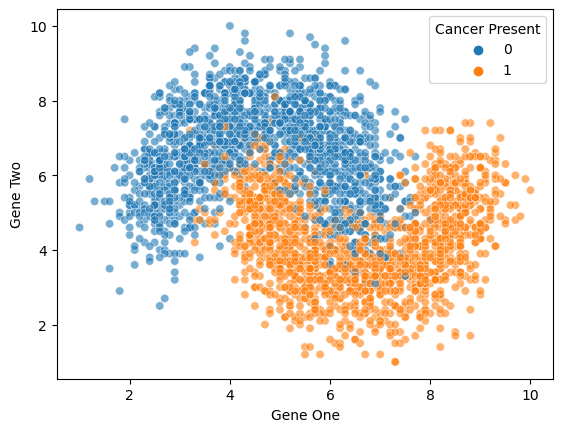

In [53]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',
               hue='Cancer Present',alpha=0.6)

# plt.xlim(2,6)
# plt.ylim(4,8)

In [54]:
len(df)

3000

In [55]:
# sns.pairplot(data=df,hue='Cancer Present')

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
from sklearn.preprocessing import StandardScaler # TO scale the data

In [58]:
X = df.drop('Cancer Present',axis=1)

In [59]:
y = df['Cancer Present']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [61]:
scaler = StandardScaler()

In [62]:
scaled_X_train = scaler.fit_transform(X_train)

In [63]:
scaled_X_test = scaler.transform(X_test)  #DON'T need to fit the x_test

In [64]:
#  scaled_X_test

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [67]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
y_pred = knn_model.predict(scaled_X_test)

In [69]:
# y_pred

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
confusion_matrix(y_test,y_pred)

array([[422,  48],
       [ 50, 380]])

In [72]:
len(y_test) #over 98(50+48) points are not being classified correctly out of 900

900

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.89      0.88      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [74]:
from sklearn.metrics import accuracy_score

In [75]:
1 - accuracy_score(y_test, y_pred) #  %error we got

0.10888888888888892

# Finding the optimal k value

## Elbow method to find the k value

In [76]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)

In [77]:
#  test_error_rates

Text(0.5, 0, 'K Neighbors')

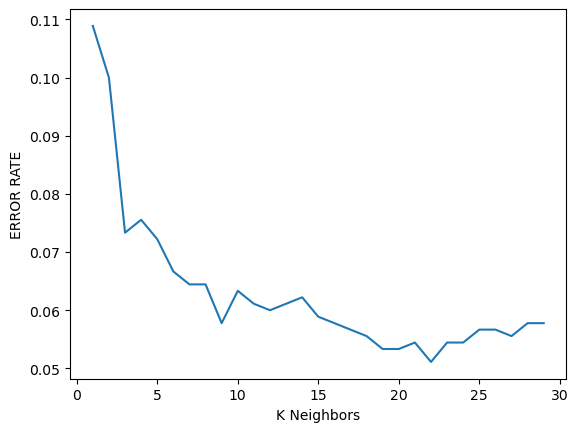

In [78]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

# cross validation

<h1>pipeline</h1><h2>It is used to setup a sequence of repeated operations. Such as a scaler and model </h2>

In [79]:
# PIPELINE  --> GRIDSEARCH CROSS VALIDATION

In [80]:
scaler = StandardScaler()

In [81]:
knn = KNeighborsClassifier()

In [82]:
# Highly recommend string code matches variable name!
operations = [('scaler',scaler),('knn',knn)]

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
pipe = Pipeline(operations)

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
k_values = list(range(1,20))

In [87]:
param_grid = {'knn__n_neighbors':k_values}  #chosen string name+__(two underscore)+parameter key name.

In [88]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
# pipe(pipleline) will scale correctly, according to the cross validation
# folds in order to only fit transform the training set of that particular 
# cross validation fold and then only transform that fit to the 
# test portion of that cross validation fold.

In [89]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [90]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [91]:
full_pred = full_cv_classifier.predict(X_test) #don't need to scale the test data
                            # it's already done in the above process

In [92]:
#full_pred

In [93]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



# prediction with another data

In [94]:
new_patient = [[3.8,6.4]]

In [95]:
full_cv_classifier.predict(new_patient)  # No cancer

array([0])

In [96]:
full_cv_classifier.predict_proba(new_patient) # 100% no cancer bacause all 
                                             #neighbors are voting for no cancer.

array([[1., 0.]])